## Importing Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

## Defining Functions and Classes

In [2]:
class BayesClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.classes, self.class_counts = np.unique(y_train, return_counts=True)
        self.no_of_classes = len(self.classes)
        self.total_data_points = len(y_train)
        self.apriori_probabilities = self.class_counts/self.total_data_points
        self.class_split_training_data = {}
        for c in self.classes:
            self.class_split_training_data[c] = []
            for j in range(len(y_train)):
                if c == y_train[j]:
                    self.class_split_training_data[c].append(X_train[j])
            self.class_split_training_data[c] = np.array(self.class_split_training_data[c])
        self.mean_vectors = []
        for c in self.classes:
            self.mean_vectors.append(np.mean(self.class_split_training_data[c], axis = 0))
        self.covariance_matrices = []
        for c in self.classes:
            self.covariance_matrices.append(np.cov(self.class_split_training_data[c], rowvar=False))
        self.inverse_covariance_matrices = []
        for c in range(len(self.classes)):
            self.inverse_covariance_matrices.append(np.linalg.inv(self.covariance_matrices[c]))
        self.dimensions = len(X_train[0])
        self.det_covariance_matrices = []
        for c in range(len(self.classes)):
            self.det_covariance_matrices.append(np.linalg.det(self.covariance_matrices[c]))

    def predict(self, X_test):
        y_pred = []
        for X in X_test:
            probability_values = {}
            class_count = 0
            for c in self.classes:
                p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.sqrt(self.det_covariance_matrices[class_count]))
                p_wx = p_xw * self.apriori_probabilities[class_count]
                probability_values[c] = p_wx
                class_count += 1
            y_pred.append(max(probability_values, key=probability_values.get))
        y_pred = np.array(y_pred)
        return y_pred

    def decision_boundary(self, ap_values):
        decision_boundaries = []
        self.X = sp.symbols('x1:%d'%(self.dimensions+1))
        self.X = np.array(self.X)
        for i in self.classes:
            for j in self.classes:
                if i < j:
                    A_i = -0.5 * self.inverse_covariance_matrices[i]
                    A_j = -0.5 * self.inverse_covariance_matrices[j]
                    B_i = np.dot(self.inverse_covariance_matrices[i], self.mean_vectors[i])
                    B_j = np.dot(self.inverse_covariance_matrices[j], self.mean_vectors[j])
                    C_i = -0.5 * np.dot(np.dot(self.mean_vectors[i].T, self.inverse_covariance_matrices[i]), self.mean_vectors[i]) - 0.5*np.log(self.det_covariance_matrices[i]) + ap_values[i]
                    C_j = -0.5 * np.dot(np.dot(self.mean_vectors[j].T, self.inverse_covariance_matrices[j]), self.mean_vectors[j]) - 0.5*np.log(self.det_covariance_matrices[j]) + ap_values[j]
                    g_i = np.dot(np.dot(self.X.T, A_i), self.X) + np.dot(B_i.T, self.X) + C_i
                    g_j = np.dot(np.dot(self.X.T, A_j), self.X) + np.dot(B_j.T, self.X) + C_j
                    g = g_i - g_j
                    decision_boundaries.append(g)
        return decision_boundaries

## Taking Data

In [3]:
X1 = np.array([[2,6], [3,4], [3,8], [4,6]])
X2 = np.array([[3,0], [1,-2], [3,-4], [5,-2]])
y1 = np.zeros(len(X1), dtype=int)
y2 = np.ones(len(X2), dtype=int)

In [4]:
print(X1)

[[2 6]
 [3 4]
 [3 8]
 [4 6]]


In [5]:
print(X2)

[[ 3  0]
 [ 1 -2]
 [ 3 -4]
 [ 5 -2]]


In [6]:
print(y1)

[0 0 0 0]


In [7]:
print(y2)

[1 1 1 1]


In [8]:
X_train = np.concatenate((X1, X2), axis=0)
y_train = np.concatenate((y1, y2), axis=0)

In [9]:
print(X_train)

[[ 2  6]
 [ 3  4]
 [ 3  8]
 [ 4  6]
 [ 3  0]
 [ 1 -2]
 [ 3 -4]
 [ 5 -2]]


In [10]:
print(y_train)

[0 0 0 0 1 1 1 1]


## Modelling the Data

In [11]:
bc = BayesClassifier()
bc.fit(X_train, y_train)

In [12]:
Z = bc.decision_boundary([0.5, 0.5])
print(Z)

[-0.5625*x1**2 + 3.375*x1 + 3.0*x2 - 10.3693528194401]


## Plotting

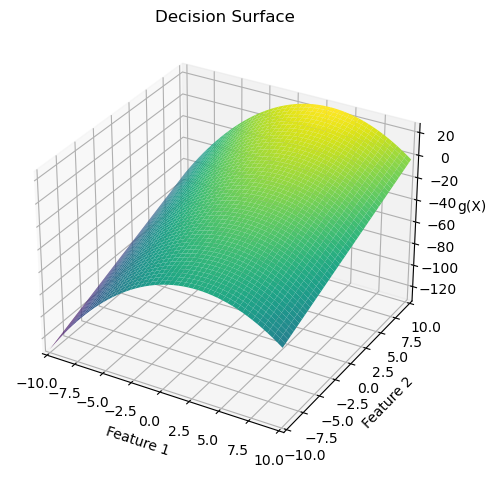

In [13]:
import sympy.plotting as splt
splt.plot3d(Z[0], (bc.X[0], -10, 10), (bc.X[1], -10, 10), title='Decision Surface', xlabel='Feature 1', ylabel='Feature 2', zlabel='g(X)')

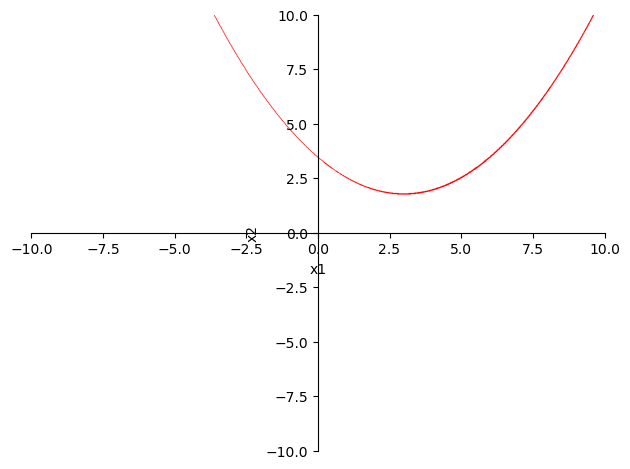

In [14]:
sp.plot_implicit(Z[0], (bc.X[0], -10, 10), (bc.X[1], -10, 10), show=True, line_color='red')